## Lesson 3

C2C Gordon McCulloh, 16 August 2018

In [10]:
import numpy as np
from datascience import *
# percent sign is a magic command
% matplotlib inline
import matplotlib.pyplot as plots # This is the plots package
plots.style.use('fivethirtyeight') # This is a plot style - blog 538
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
from datascience.predicates import are

Q2: Use basic Python operators to find the number of seconds in the month of June. Find the number of seconds that have lapsed between 1 June at noon and 14 Aug, 9:30 AM

In [11]:
June_seconds = 30*24*60*60
June_seconds

2592000

In [12]:
Elapse = June_seconds-12*60*60+(31+13)*24*60*60+9.5*60*60
Elapse

6384600.0

Q3: Import a table ('world_population.csv') and find:
a. The population in 2015 (the dataset begins at 1950)
b. The population growth between 1950 and 2015
c. The average annual growth rate over the course of the dataset

In [13]:
World_Pop = Table.read_table('world_population.csv')

In [14]:
World_Pop = World_Pop.with_columns("Year",np.arange(1950,2016))

In [15]:
print("The world population in 2015 is",int(World_Pop.where("Year",2015).column("Population")))

The world population in 2015 is 7256490011


In [16]:
Pop50 = int(World_Pop.where("Year",1950).column("Population"))
Pop15 = int(World_Pop.where("Year",2015).column("Population"))
print("The population growth between 1950 and 2015 is",Pop15-Pop50)

The population growth between 1950 and 2015 is 4698861357


To find the average annual growth rate over the course of the dataset, I will use the equation from Chapter 3 of the Data8 Textbook.

In [17]:
t = len(World_Pop.column("Population"))
Avg_Growth = (Pop15/Pop50)**(1/t)-1
print("Avg. annual growth rate over the course of the dataset:",Avg_Growth*100,"%")

Avg. annual growth rate over the course of the dataset: 1.5925721968250928 %


Q4: The 'Titanic' dataset describes passengers on the Titanic when it sank. a. Relabel the 'Pclass' column to 'passenger_class' b. Creat a new column 'family size' that adds the number of siblings/spouses, 'SibSp', to the number of children, 'Parch' c. Create a barplot of number of passengers, broken down by passenger class d. Sort the data by age and show the youngest 5 passengers e. Now sort by age fom oldest to youngest and show the oldest 5 passengers. What did you notice? Eliminate these "nan" values and try again f. Find the survival rate for passengers of the Titanic, broken down by passenger class g. Now that you have some familiarity with the dataset, create two of your own questions and answer them.

In [18]:
Titanic = Table.read_table('Titanic.csv')

In [19]:
Titanic = Titanic.relabel("Pclass","passenger_class")
Titanic = Titanic.with_columns("family size",(Titanic.column("SibSp")+Titanic.column("Parch")))

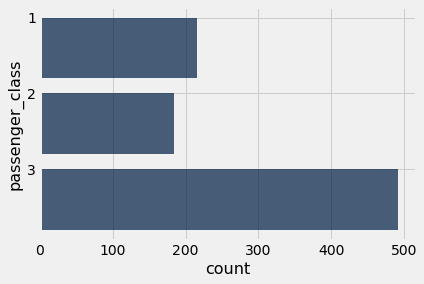

In [20]:
Titanic_passengers = Titanic.group("passenger_class")
Titanic_passengers.barh("passenger_class")

In [21]:
Titanic = Titanic.sort("Age")
Titanic.take(np.arange(1,6)) # arranges the youngest five passengers

PassengerId,Survived,passenger_class,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family size
756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5,nan,S,2
470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,nan,C,3
645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,nan,C,3
79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29,nan,S,2
832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.75,nan,S,2


In [29]:
Titanic_proxy = Titanic.sort("Age",descending=True)
Titanic_proxy.take(range(6)) # showing nan values

PassengerId,Survived,passenger_class,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family size
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,nan,1,2,W./C. 6607,23.45,nan,S,3
879,0,3,"Laleff, Mr. Kristo",male,nan,0,0,349217,7.8958,nan,S,0
869,0,3,"van Melkebeke, Mr. Philemon",male,nan,0,0,345777,9.5,nan,S,0
864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,nan,8,2,CA. 2343,69.55,nan,S,10
860,0,3,"Razi, Mr. Raihed",male,nan,0,0,2629,7.2292,nan,C,0
850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,nan,1,0,17453,89.1042,C92,C,1


In [30]:
Titanic_proxy2 = Titanic_proxy.where("Age",are.below(100)) # setting an upper limit to eliminate nan
Titanic_proxy2.take(range(6)) # showing data values

PassengerId,Survived,passenger_class,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family size
631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80,0,0,27042,30,A23,S,0
852,0,3,"Svensson, Mr. Johan",male,74,0,0,347060,7.775,nan,S,0
494,0,1,"Artagaveytia, Mr. Ramon",male,71,0,0,PC 17609,49.5042,nan,C,0
97,0,1,"Goldschmidt, Mr. George B",male,71,0,0,PC 17754,34.6542,A5,C,0
117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.75,nan,Q,0
746,0,1,"Crosby, Capt. Edward Gifford",male,70,1,1,WE/P 5735,71,B22,S,2


In [25]:
Titanic_proxy3 = Titanic.select("passenger_class","Survived") # selects a row from the data table
Titanic_proxy4 = Titanic_proxy3.groups(["Survived","passenger_class"]) # groups multiple rows together
# Now, I find the proportion of survivors within the 4th proxy table using the survived column as an arbitrary place-marker for the full table
Survive_Data = Titanic_proxy4.where("Survived",1).column("count")/(Titanic_proxy4.where("Survived",1).column("count")+Titanic_proxy4.where("Survived",0).column("count"))
# Finally, I create a last proxy table to group the necessary data for (f)
Titanic_proxy5 = Titanic_proxy3.group("passenger_class").with_column("Survival Rates",Survive_Data)
Titanic_proxy5

passenger_class,count,Survival Rates
1,216,0.62963
2,184,0.472826
3,491,0.242363


In [26]:
print("Question 1: What was the average fare of males compared to that of females?")

Avg_Fare = [0,0] # initializing an array for average values
Sex_Dist = Titanic.group("Sex").column("count") # counting the number of males and females
# computing averages using proportions and sums, then inputting into the blank table
Avg_Fare[0] = sum(Titanic.where("Sex","male").column("Fare"))/Sex_Dist[0] 
Avg_Fare[1] = sum(Titanic.where("Sex","female").column("Fare"))/Sex_Dist[1]
Titanic.group("Sex").with_column("Average Fare",Avg_Fare)

Question 1: What was the average fare of males compared to that of females?


Sex,count,Average Fare
female,314,46.9022
male,577,24.2057


In [37]:
print("Question 2: What was the survival rate of males compared to that of females?")

# identical coding methods as in (f)
Titanic_proxy6 = Titanic.select("Sex","Survived") 
Titanic_proxy7 = Titanic_proxy6.groups(["Survived","Sex"])
Survive_Data = Titanic_proxy7.where("Survived",1).column("count")/(Titanic_proxy7.where("Survived",1).column("count")+Titanic_proxy7.where("Survived",0).column("count"))
Titanic_proxy8 = Titanic_proxy6.group("Sex").with_column("Survival Rates",Survive_Data)
Titanic_proxy8

Question 2: What was the survival rate of males compared to that of females?


Sex,count,Survival Rates
female,314,0.742038
male,577,0.188908


Documentation: I consulted course materials and online Python documentation to complete this assignment. I also collaborated with C2C Eric Hembling, who showed me different documentation methods for completing parts (e) and (f) of Q4. 